In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mov_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
#Removing bad columns - they all with text data
mov_df = mov_df.drop(columns=['homepage', 'overview', 'tagline', 'overview'])
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(10)
memory usage: 638.0+ KB


In [5]:
#filling miising values in runtime column
mov_df.loc[mov_df['runtime'].isnull()]

budget                               genres      id  \
2656  15000000        [{"id": 18, "name": "Drama"}]  370980   
4140         2  [{"id": 99, "name": "Documentary"}]  459488   

                                               keywords original_language  \
2656  [{"id": 717, "name": "pope"}, {"id": 5565, "na...                it   
4140  [{"id": 6027, "name": "music"}, {"id": 225822,...                en   

                                  original_title  popularity  \
2656  Chiamatemi Francesco - Il Papa della gente    0.738646   
4140                 To Be Frank, Sinatra at 100    0.050625   

                                  production_companies  \
2656            [{"name": "Taodue Film", "id": 45724}]   
4140  [{"name": "Eyeline Entertainment", "id": 60343}]   

                                  production_countries release_date  revenue  \
2656           [{"iso_3166_1": "IT", "name": "Italy"}]   2015-12-03        0   
4140  [{"iso_3166_1": "GB", "name": "United Kingdom"}]   2015-12-12        0   

      runtime                               spoken_languages    status  \
2656      NaN  [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]  Released   
4140      NaN                                             []  Released   

                                           title  vote_average  vote_count  
2656  Chiamatemi Francesco - Il Papa della gente           7.3          12  
4140                 To Be Frank, Sinatra at 100           0.0           0

In [6]:
# Вручную выставляем правильные значения
mov_df['runtime'][2656] = 98
mov_df['runtime'][4140] = 81
mov_df.loc[mov_df['runtime'].isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Empty DataFrame
Columns: [budget, genres, id, keywords, original_language, original_title, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, title, vote_average, vote_count]
Index: []

In [7]:
#searcing for missing release date - empty string, better to drop
mov_df.loc[mov_df['release_date'].isnull()]

budget genres      id keywords original_language  \
4553       0     []  380097       []                en   

                  original_title  popularity production_companies  \
4553  America Is Still the Place         0.0                   []   

     production_countries release_date  revenue  runtime spoken_languages  \
4553                   []          NaN        0      0.0               []   

        status                       title  vote_average  vote_count  
4553  Released  America Is Still the Place           0.0           0

In [8]:
mov_df = mov_df.drop(index=4553)
mov_df.loc[mov_df['release_date'].isnull()]

Empty DataFrame
Columns: [budget, genres, id, keywords, original_language, original_title, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, title, vote_average, vote_count]
Index: []

In [9]:
mov_df.loc[mov_df['budget'] == 0]

budget                                             genres      id  \
265        0  [{"id": 35, "name": "Comedy"}, {"id": 14, "nam...   10588   
321        0                     [{"id": 35, "name": "Comedy"}]   77953   
359        0  [{"id": 12, "name": "Adventure"}, {"id": 16, "...  258509   
406        0  [{"id": 18, "name": "Drama"}, {"id": 16, "name...   51052   
409        0  [{"id": 18, "name": "Drama"}, {"id": 10402, "n...   16858   
453        0  [{"id": 28, "name": "Action"}, {"id": 35, "nam...   12096   
463        0  [{"id": 10749, "name": "Romance"}, {"id": 18, ...  161795   
474        0  [{"id": 9648, "name": "Mystery"}, {"id": 18, "...  330770   
475        0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...    9433   
489        0  [{"id": 99, "name": "Documentary"}, {"id": 107...   36970   
542        0  [{"id": 28, "name": "Action"}, {"id": 18, "nam...   25769   
584        0                    [{"id": 14, "name": "Fantasy"}]   10395   
601        0  [{"id": 28, "name": "Action"}, {"id": 878, "na...   11535   
691        0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   11199   
721        0  [{"id": 35, "name": "Comedy"}, {"id": 12, "nam...   10628   
735        0  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...   10771   
745        0  [{"id": 28, "name": "Action"}, {"id": 35, "nam...   10040   
757        0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   87825   
766        0  [{"id": 16, "name": "Animation"}, {"id": 35, "...    9513   
847        0                     [{"id": 35, "name": "Comedy"}]   13260   
881        0  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   39437   
882        0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...    1950   
897        0  [{"id": 35, "name": "Comedy"}, {"id": 10751, "...    9969   
915        0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...    9441   
948        0                     [{"id": 35, "name": "Comedy"}]   10393   
1007       0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   96724   
1011       0                     [{"id": 27, "name": "Horror"}]   53953   
1016       0  [{"id": 35, "name": "Comedy"}, {"id": 14, "nam...   11232   
1023       0                      [{"id": 18, "name": "Drama"}]    7504   
1028       0  [{"id": 18, "name": "Drama"}, {"id": 878, "nam...     593   
...      ...                                                ...     ...   
4761       0                     [{"id": 35, "name": "Comedy"}]  222250   
4762       0                      [{"id": 18, "name": "Drama"}]   18292   
4763       0  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...  125537   
4764       0  [{"id": 53, "name": "Thriller"}, {"id": 18, "n...  326576   
4765       0                     [{"id": 27, "name": "Horror"}]  228550   
4766       0  [{"id": 99, "name": "Documentary"}, {"id": 104...   13963   
4768       0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   44770   
4769       0  [{"id": 28, "name": "Action"}, {"id": 37, "nam...   69382   
4771       0                     [{"id": 27, "name": "Horror"}]  220490   
4775       0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   33693   
4776       0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   14585   
4777       0                      [{"id": 18, "name": "Drama"}]  185465   
4778       0  [{"id": 28, "name": "Action"}, {"id": 18, "nam...   38780   
4779       0                     [{"id": 35, "name": "Comedy"}]   14022   
4780       0  [{"id": 53, "name": "Thriller"}, {"id": 80, "n...  366967   
4782       0  [{"id": 18, "name": "Drama"}, {"id": 10751, "n...   17345   
4783       0  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...  226458   
4784       0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   24055   
4785       0                      [{"id": 18, "name": "Drama"}]  287625   
4786       0  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   44990   
4787       0  [{"id": 878, "name": "Science Fiction"}, {"id"...   86304   
4789       0                   

In [10]:
budget_genre = mov_df[['id', 'budget', 'revenue', 'genres']]
budget_genre.head()

id     budget     revenue  \
0   19995  237000000  2787965087   
1     285  300000000   961000000   
2  206647  245000000   880674609   
3   49026  250000000  1084939099   
4   49529  260000000   284139100   

                                              genres  
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...  
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...  
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...

In [11]:
#Drop small budget & revenue
budget_genre = budget_genre.drop(budget_genre.loc[budget_genre['budget']<10000].index)
budget_genre = budget_genre.drop(budget_genre.loc[budget_genre['revenue']<10000].index)

In [12]:
budget_genre.describe()

id        budget       revenue
count    3205.000000  3.205000e+03  3.205000e+03
mean    44687.027457  4.092764e+07  1.221444e+08
std     74493.670999  4.444521e+07  1.867065e+08
min         5.000000  1.000000e+04  1.000000e+04
25%      4944.000000  1.100000e+07  1.743651e+07
50%     11411.000000  2.550000e+07  5.629847e+07
75%     45269.000000  5.500000e+07  1.477804e+08
max    417859.000000  3.800000e+08  2.787965e+09

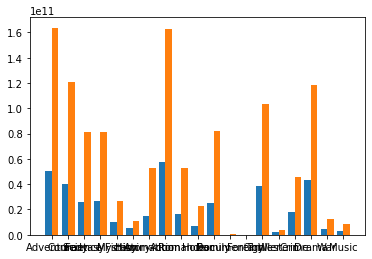

In [13]:
#Getting genres from table
genre_set = set()
for cur_str in budget_genre['genres']:
    cur_list = json.loads(cur_str)
    for cur_dict in cur_list:
        genre_set.add(cur_dict['name'])
        
#Filling empty dicts for revenue - looks like it will work faster, than checking each time
budget_dict = {}
revenue_dict = {}
for cur_gen in genre_set:
    budget_dict[cur_gen] = 0
    revenue_dict[cur_gen] = 0
    
for i in budget_genre.index:
    cur_str = budget_genre['genres'][i]
    cur_budget = budget_genre['budget'][i]
    cur_revenue = budget_genre['revenue'][i]
    for cur_gen in genre_set:
        if cur_gen in cur_str:
            budget_dict[cur_gen] += cur_budget
            revenue_dict[cur_gen] += cur_revenue
            
plt.bar(x=list(budget_dict.keys()), height=list(budget_dict.values()), width=-0.4, align='edge')
plt.bar(x=list(revenue_dict.keys()), height=list(revenue_dict.values()), width=0.4, align='edge')
plt.show()
# list(budget_dict.values())

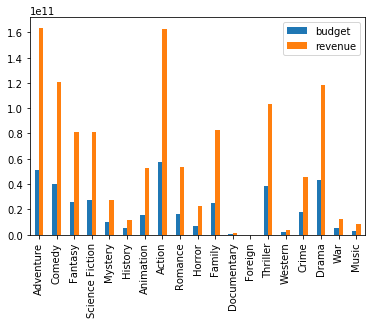

In [14]:
#Не нашел разумного способа повернуть надписи на графике. Преобразуем в DataFrame
br_df = pd.DataFrame(index=budget_dict.keys(), columns=['budget', 'revenue'])
# br_df.index = budget_dict.keys()
br_df['budget'] = budget_dict.values()
br_df['revenue'] = revenue_dict.values()
br_df.plot(kind='bar', rot=90)

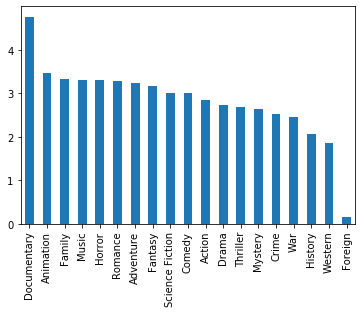

In [15]:
# График выше не показывает, какие направления наиболее выгодные в процентном отношении. Построим график отношения
br_df['diff'] = br_df['revenue']/br_df['budget']
br_df.sort_values('diff', ascending=False)['diff'].plot(kind='bar')
# Вывод - если ты начинающий режиссер и хочешь легких денег - иди снимай документальные фильмы, самая высокая норма прибыли.
# Ну или мультики. Ужасы на 5-м месте тоже радуют :)

In [16]:
# Пробуем понять, что находится в жанре Foreing
def grab_for(genre_str):
    if genre_str.find('Foreign') >=0:
        return True
    
    return False

# mov_df['genres'].apply(grab_for)
mov_df.loc[mov_df['genres'].apply(grab_for)] #34 фильма, большая часть информации отсутствует.
                                            # Предлагаю считать неинтересным выбросом и обшибкой ввода

budget                                             genres      id  \
2248        0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   14652   
2658        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   40880   
2959        0  [{"id": 18, "name": "Drama"}, {"id": 28, "name...   45138   
2971        0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   58051   
3134        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   14608   
3191        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   27329   
3196  5000000  [{"id": 18, "name": "Drama"}, {"id": 10751, "n...   15699   
3226        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   20360   
3322        0  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   55903   
3419        7  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   38415   
3435        0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   26665   
3547        0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   22908   
3553        0  [{"id": 18, "name": "Drama"}, {"id": 28, "name...   63006   
3645        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   38428   
3703        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   65749   
3707        0  [{"id": 28, "name": "Action"}, {"id": 35, "nam...   66607   
3708  4500000  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   17139   
3729  3250000  [{"id": 18, "name": "Drama"}, {"id": 10751, "n...   26379   
3732        0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   47452   
3787        0  [{"id": 35, "name": "Comedy"}, {"id": 10769, "...   20468   
3844        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   89540   
3923        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...    7509   
4004        0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   33106   
4059        0  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   31163   
4123  7000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   20653   
4135        0  [{"id": 18, "name": "Drama"}, {"id": 28, "name...   22600   
4182        0  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   37232   
4260  1400000  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   44413   
4371  1000000  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   56666   
4459        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   78705   
4490        0  [{"id": 99, "name": "Documentary"}, {"id": 107...   40658   
4666   225000  [{"id": 10769, "name": "Foreign"}, {"id": 99, ...  139948   
4790        0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   13898   
4797        0  [{"id": 10769, "name": "Foreign"}, {"id": 53, ...   67238   

                                               keywords original_language  \
2248                                                 []                fr   
2658                                                 []                en   
2959                 [{"id": 11578, "name": "mobster"}]                it   
2971                                                 []                hi   
3134  [{"id": 8029, "name": "drama"}, {"id": 10183, ...                en   
3191  [{"id": 2011, "name": "queen"}, {"id": 3434, "...                th   
3196  [{"id": 4781, "name": "miner"}, {"id": 5657, "...                en   
3226                                                 []                en   
3322                                                 []                fr   
3419  [{"id": 4344, "name": "musical"}, {"id": 18705...                en   
3435  [{"id": 567, "name": "alcohol"}, {"id": 2150, ...                en   
3547  [{"id": 4951, "name": "rejection"}, {"id": 605...                en   
3553  [{"id": 7090, "name": "goa"}, {"id": 33067, "n...                hi   
3645  [{"id": 5565, "name": "biography"}, {"id": 792...                hi   
3703  [{"id": 733, "name": "dancer"}, {"id": 2683, "...                es   
3707                                                 []                en   
3708           [{"id": 3683, "name": 

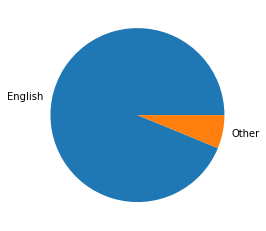

In [17]:
en_films = mov_df['original_language'].value_counts()['en']
other_films = len(mov_df)- en_films

a,b = plt.pie(x=[en_films, other_films], labels=['English', 'Other'])

# Большинство фильмов (>90%) в этой базе снято на английском языке. Это совершенно точно проблема базы/выборки. 
# Например, на русском языке там только 11 фильмов. Зато хорошо рисовать Pie))

In [18]:
sns_plot = sns.pairplot(mov_df[['popularity', 'runtime', 'vote_average', 'vote_count']])
sns_plot

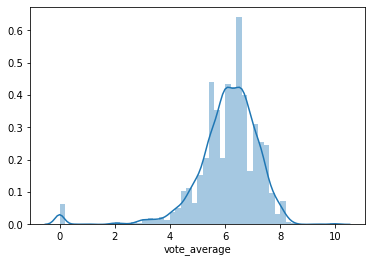

In [19]:
# Смотрим распределение vote_average - оно нормальное, но есть выброс в районе нуля - незаполненные данные, будем чистить
sns.distplot(mov_df.vote_average)

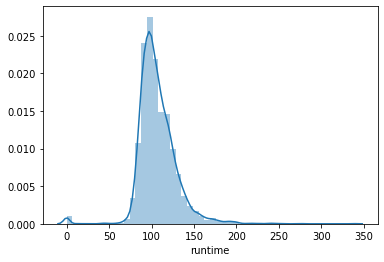

In [20]:
# Аналогично для runtime
sns.distplot(mov_df.runtime)

In [21]:
# Очищаем от нулевых значений оценок и времени
mov_df_clean = mov_df.drop(mov_df.loc[mov_df['runtime']==0].index)
mov_df_clean = mov_df_clean.drop(mov_df_clean.loc[mov_df_clean['vote_average']==0].index)

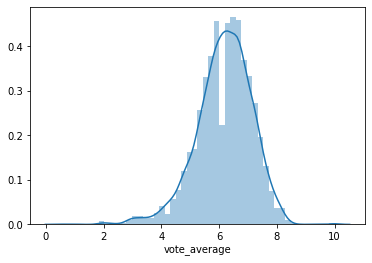

In [22]:
sns.distplot(mov_df_clean.vote_average)

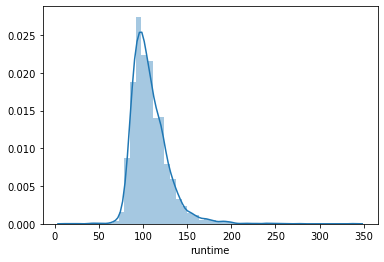

In [23]:
sns.distplot(mov_df_clean.runtime)

In [24]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(mov_df_clean.runtime, mov_df_clean.vote_average)
print(corr)
# коэффициент корреляции 0.36 - то есть оценка фильма слабо зависит от длительности

0.36220538461456403
